In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url  = 'https://drive.google.com/file/d/10dpoB7eo__Ho0ez9G3NIVzhoyuruiQEI/view?usp=drive_link'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [5]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<h3><mark>Classes
</mark></h3>

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

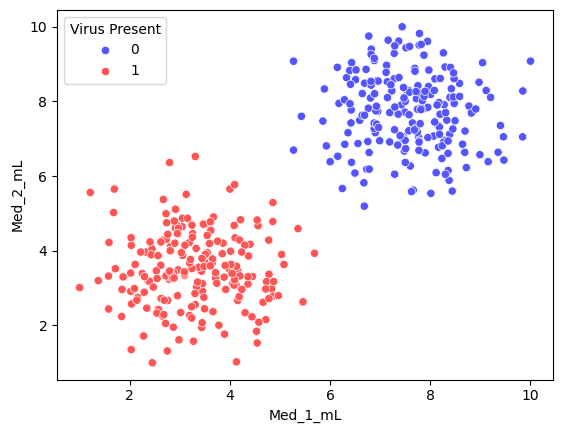

In [6]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

<h3><mark>Separating Hyperplane</mark></h3>

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a lin4>

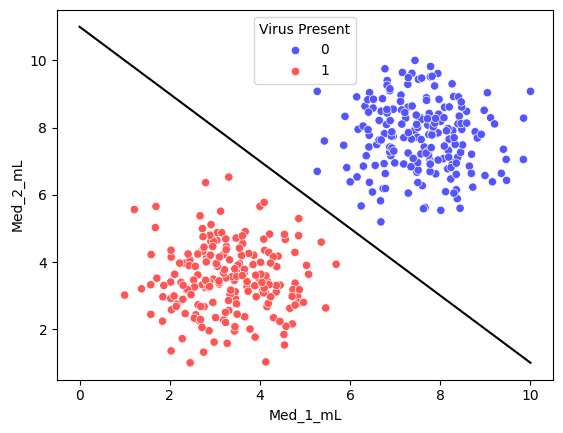

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

<h2><mark>SVM - Support Vector Machine</mark></h2>

In [8]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [9]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [10]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [11]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


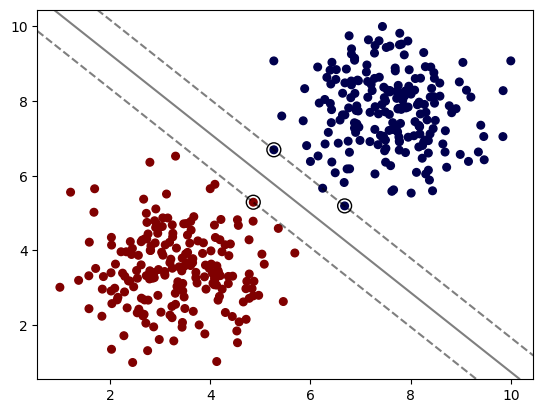

In [12]:
plot_svm_boundary(model,X,y)

<h3><mark>Hyper Parameters</mark></h3>

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [13]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


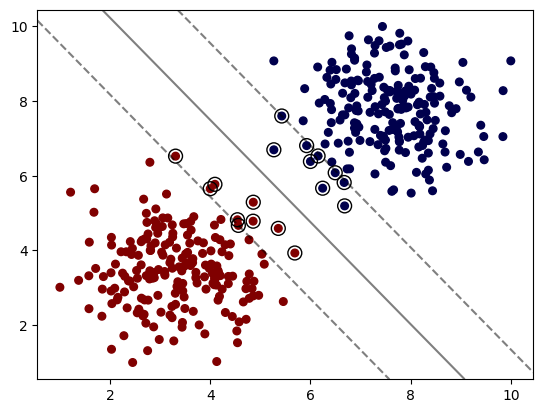

In [14]:
plot_svm_boundary(model,X,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


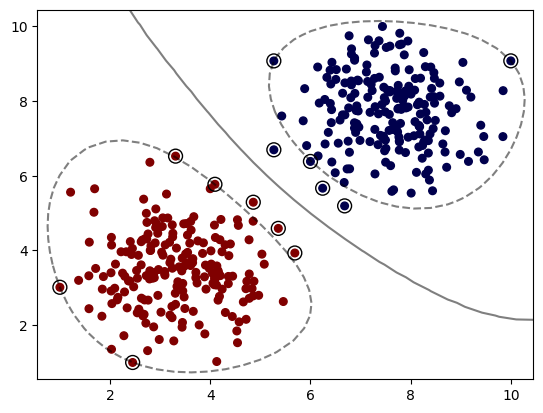

In [15]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


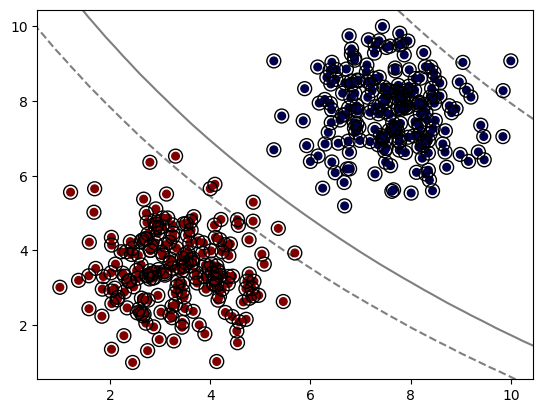

In [16]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

as gamma increases it holds more noise from training dataset

C:\Users\SAMI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


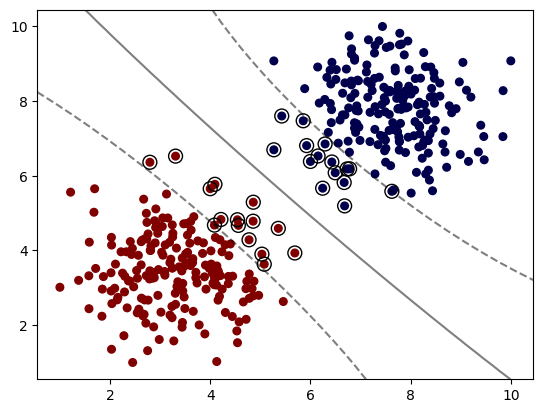

In [18]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [21]:
# Note again we didn't split Train|Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [22]:
# 100% accuracy (as expected)
grid.best_score_

1.0

In [23]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}